In [1]:
from __future__ import print_function, division
import os, bz2, json, time
from datetime import timedelta

import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import sys
sys.path.insert(0, '../')
from pyhip import HIP

## Exploring ACTIVE dataset

In [2]:
with bz2.BZ2File('../data/active-dataset.json.bz2') as f:
    dataset = json.loads(f.readline())
print(len(dataset))
attributes = ["YoutubeID","numTweet","numShare","numSubscriber","watchTime","dailyViewcount",\
              "description","title","channelId","channelTitle","category","uploadDate","duration",\
              "definition","dimension","caption","regionRestriction.blocked",\
              "regionRestriction.allowed","topicIds","relevantTopicIds","totalShare",\
              "totalViewcount","totalTweet","dailyTweets"]

14041


In [24]:
# example video 00-6OyXVA0M
example_ind = 6560
for att in attributes:
    if type(dataset[example_ind][att]) is list:
        print(att,": list length",len(dataset[example_ind][att]))
    else:
        print(att,":",dataset[example_ind][att]) 

YoutubeID : a01_v4CmxDY
numTweet : list length 4980
numShare : list length 152
numSubscriber : list length 152
watchTime : list length 152
dailyViewcount : list length 152
description : NA
title : NA
channelId : NA
channelTitle : NA
category : NA
uploadDate : 2014-08-15 10:00:00
duration : NA
definition : NA
dimension : NA
caption : NA
regionRestriction.blocked : {}
regionRestriction.allowed : {}
topicIds : {}
relevantTopicIds : {}
totalShare : 157
totalViewcount : 30269
totalTweet : 316
dailyTweets : list length 152


In [8]:
dataset[example_ind]["relevantTopicIds"]

['/m/06bvp']

In [4]:
active_series = {}
for video in dataset:
    active_series[video['YoutubeID']] = (video['dailyTweets'], video['numShare'], video['dailyViewcount'], video['watchTime'])
pd_active = pd.DataFrame.from_dict(active_series, orient="index", columns=("dailyTweets", "numShare", "dailyViewcount", "watchTime"))
pd_active.head()

,dailyTweets,numShare,dailyViewcount,watchTime
00-6OyXVA0M,"[2588, 455, 157, 100, 86, 76, 102, 64, 28, 23,...","[254, 1399, 493, 242, 175, 216, 372, 729, 305,...","[90158, 695628, 312298, 170348, 82346, 61530, ...","[59311.9833333, 455426.75, 206253.816667, 1119..."
00ATf2HR-FA,"[75, 25, 18, 18, 15, 5, 10, 2, 0, 1, 2, 0, 1, ...","[12, 47, 14, 32, 32, 12, 5, 4, 3, 4, 1, 0, 3, ...","[14939, 40664, 21261, 30914, 31073, 20395, 117...","[2937.13333333, 9039.33333333, 5082.71666667, ..."
00bumpN0Mhw,"[507, 227, 119, 88, 68, 77, 89, 74, 59, 41, 41...","[583, 316, 178, 107, 92, 84, 135, 122, 133, 90...","[89627, 63829, 46999, 42951, 42902, 36271, 416...","[235606.866667, 177160.183333, 133966.883333, ..."
00f0ct78HcU,"[39, 20, 5, 3, 4, 1, 2, 1, 2, 3, 2, 1, 0, 2, 0...","[38, 11, 4, 4, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0...","[91431, 52484, 26459, 14774, 7700, 5314, 4872,...","[119054.283333, 68698.1166667, 34243.9166667, ..."
00g2ZbI3ung,"[60, 3, 1, 0, 1, 2, 4, 2, 2, 2, 0, 0, 1, 1, 0,...","[18, 3, 1, 1, 5, 5, 3, 2, 1, 1, 1, 0, 2, 1, 0,...","[15512, 5027, 2691, 1861, 2563, 3891, 2751, 22...","[11655.7333333, 3733.05, 2094.01666667, 1368.9..."


## category study

In [15]:
for i in range(len(dataset)):
    video = dataset[i]
    if video["category"]=="NA":
        print(i, video)
        break

6560 {'YoutubeID': 'a01_v4CmxDY', 'numTweet': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [18]:
# 6560, a01_v4CmxDY
dataset[6560]["dailyTweets"].index("NA")

130

In [23]:
# total: 14041->13738
cat_videos = {}
for video in dataset:
    if video["category"] in cat_videos: 
        cat_videos[video["category"]].append(video["YoutubeID"])
    else:
        cat_videos[video["category"]]=[video["YoutubeID"]]

total = 0
for k,v in cat_videos.items():
    total += len(v)
    print(k+":", len(v))
print("total:", total)

Entertainment: 1881
Pets & Animals: 48
Music: 2777
Film & Animation: 513
News & Politics: 1320
Gaming: 695
People & Blogs: 1536
Education: 236
Comedy: 661
Sports: 492
Howto & Style: 136
Science & Technology: 216
Nonprofits & Activism: 257
Travel & Events: 52
Autos & Vehicles: 92
Shows: 28
NA: 3101
total: 14041


In [13]:
14041-48-52-92-28

13821

## Reproducing fitting and forecasting

In [25]:
active_videos = {}
for video in dataset:
    active_videos[video['YoutubeID']] = (video['numShare'], video['dailyViewcount'], video['watchTime'])
print("dataset size:", len(active_videos))

dataset size: 14041


In [26]:
num_train = 90
num_test = 30
num_initialization = 25

In [27]:
test_vid = 'a01_v4CmxDY'
daily_share, daily_view, daily_watch = active_videos[test_vid]
print("Video {} has record of {} days".format(test_vid, len(daily_share)))

Video a01_v4CmxDY has record of 152 days


--- Finish initialization set 5...
--- Finish initialization set 10...
--- Finish initialization set 15...
--- Finish initialization set 20...
--- Finish initialization set 25...
--- Model fitting RMSE: 71.55
--- Model forecast RMSE: 117.41
--- mu=46.68, theta=17.61, C=71.00
--- c=0.28, gamma=578.46, eta=5.46
--- endo=4.38, viral=204.41


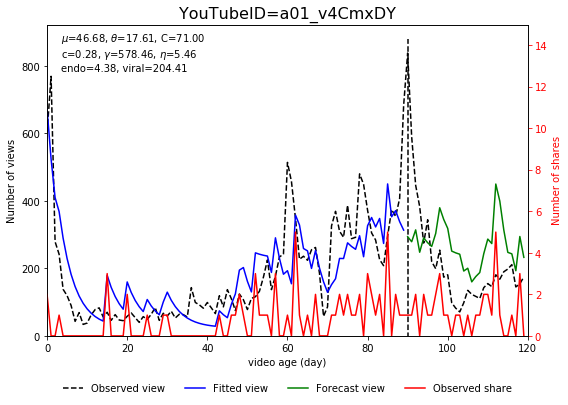

In [28]:
hip_model = HIP()
hip_model.initial(daily_share, daily_view, num_train, num_test, num_initialization)
hip_model.fit_with_bfgs()
hip_model.print_parameters()
hip_model.plot_func('YouTubeID={0}'.format(test_vid))

## Reproduce visualizations in paper

In [ ]:
# shares: Popularity scale at 60 days
days = 60
shares = {}
for sample in dataset:
    counts = 0 
    for day in range(days):
        counts += sample["numShare"][day]
    shares[sample["YoutubeID"]] = counts
pd_shares = pd.DataFrame.from_dict(shares, orient="index", columns=("share_day{}".format(days),))
pd_shares.head()

In [ ]:
pd_shares.sort_values(by=["share_day60"], inplace=True)
display(pd_shares.head(10))
pd_shares.tail(10)

In [ ]:
bin_width = len(pd_shares) // 40
pop_scales = []
for i in range(40):
    if i!=40-1:
        log_vals = [math.log(x, 10) if x>=10 else -1 for x in pd_shares["share_day{}".format(days)].
                           iloc[bin_width*i:bin_width*i+bin_width]]
    else:
        log_vals = [math.log(x, 10) if x>=10 else -1 for x in pd_shares["share_day{}".format(days)].
                   iloc[bin_width*i:-1]]
    pop_scales.append(list(filter(lambda x: x!=-1,log_vals)))

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.boxplot(pop_scales)
ax1.set_ylabel("Log of share upto {} days".format(days))
# yticklabels = ["10e{}".format(y.get_text()) for y in ax1.get_yticklabels()]
# ax1.set_yticklabels(yticklabels)
pass

In [ ]:
def plot_pop_percentile(pop_att, days, dataset):
    shares = {}
    for sample in dataset:
        counts = 0 
        for day in range(days):
            counts += sample[pop_att][day]
        shares[sample["YoutubeID"]] = counts
    col_name = "{}_day{}".format(pop_att, days)
    pd_shares = pd.DataFrame.from_dict(shares, orient="index", columns=(col_name,))
    pd_shares.sort_values(by=[col_name], inplace=True)
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(111)
    ax1.boxplot(pop_scales)
    ax1.set_ylabel("Log of share upto {} days".format(days))
    pass